<a href="https://colab.research.google.com/github/KenDaupsey/Poisson-Regression-Modeling-with-Date-Transformation/blob/main/Poisson_Regression_Modeling_with_Date_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Poisson Regression Modeling with Date Transformation ***

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Poisson-Regression-Modeling-with-Date-Transformation/main/Poisson_Ice_Ceam_Sales.csv"

df = pd.read_csv(url)
df.head()

,date,ice_cream_sales,temperature,advertising_expenditure
0,1/1/2022,57,26.189061,3623
1,1/2/2022,184,20.718089,3000
2,1/3/2022,152,22.445730,4931
3,1/4/2022,187,22.855735,1414
4,1/5/2022,55,24.769002,1220


In [63]:
df.tail()

,date,ice_cream_sales,temperature,advertising_expenditure
1821,12/27/2026,187,22.313070,4779
1822,12/28/2026,80,30.224960,1943
1823,12/29/2026,107,25.011493,2411
1824,12/30/2026,159,21.204031,1607
1825,12/31/2026,167,20.527690,3688


In [64]:
### Adding Derived Regression Variables
#We’ll add a few derived regression variables to the X matrix.
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Derive 'month' from the 'date' column
df['month'] = df['date'].dt.month

# Derive 'day_of_week' from the 'date' column (Monday=0, Sunday=6)
df['day_of_week'] = df['date'].dt.dayofweek

# Derive 'day' from the 'date' column
df['day'] = df['date'].dt.day

# Display the DataFrame to confirm the changes
print(df.head())

        date  ice_cream_sales  temperature  advertising_expenditure  month  \
0 2022-01-01               57    26.189061                     3623      1   
1 2022-01-02              184    20.718089                     3000      1   
2 2022-01-03              152    22.445730                     4931      1   
3 2022-01-04              187    22.855735                     1414      1   
4 2022-01-05               55    24.769002                     1220      1   

   day_of_week  day  
0            5    1  
1            6    2  
2            0    3  
3            1    4  
4            2    5  


In [65]:
### Data Splitting for Training and Testing
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=1447
Testing data set length=379


In [66]:
### Regression Formula Specification
expr = """ice_cream_sales ~ day  + day_of_week + month + temperature + advertising_expenditure"""

In [67]:
### Poisson Regression with Day of Week Dummy Variables

#import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame

# Define dependent variable
y_train = df_train['ice_cream_sales']
y_test = df_test['ice_cream_sales']

# Define independent variables
X_train = df_train[['day', 'month', 'temperature', 'advertising_expenditure', 'day_of_week']]
X_test = df_test[['day', 'month', 'temperature', 'advertising_expenditure', 'day_of_week']]

# Add intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit Poisson regression model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        ice_cream_sales   No. Observations:                 1447
Model:                            GLM   Df Residuals:                     1441
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16643.
Date:                Tue, 05 Mar 2024   Deviance:                       23746.
Time:                        03:40:58   Pearson chi2:                 2.28e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02713
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [68]:
# Make some predictions on the test data set.
poisson_predictions = poisson_model.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
0     121.996131  0.801408     120.435469     123.577018
8     122.469537  0.806948     120.898118     124.061382
9     126.726948  0.926035     124.924889     128.555002
13    124.359702  0.589353     123.209938     125.520194
21    124.353691  0.808583     122.778953     125.948626
...          ...       ...            ...            ...
1802  124.842415  0.855492     123.176892     126.530458
1810  124.964727  0.674610     123.649485     126.293959
1812  123.718256  0.731369     122.293071     125.160049
1824  126.483104  0.940255     124.653598     128.339461
1825  125.704940  0.916291     123.921810     127.513728

[379 rows x 4 columns]


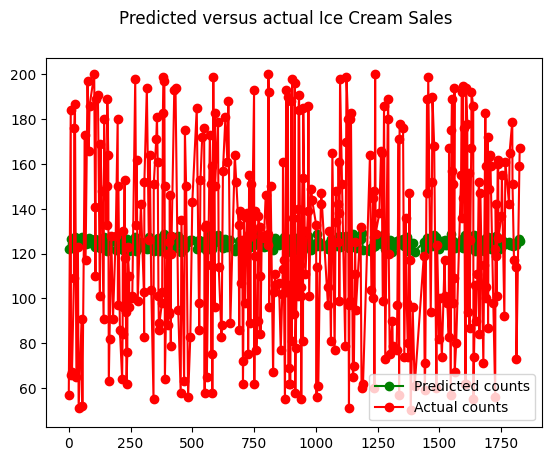

In [69]:
predicted_counts = predictions_summary_frame['mean']

# Mlot the predicted counts versus the actual counts for the test data.
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Predicted versus actual Ice Cream Sales')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, y_test, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 640x480 with 0 Axes>

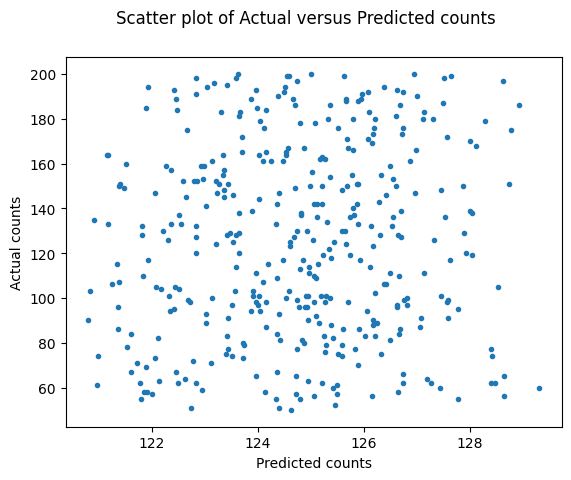

In [70]:
# Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=y_test, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()